# 서울시 유가 정보 분석

In [296]:
import pandas as pd

# file name 합치기
from glob import glob

In [297]:
station_files = glob("../Data/Oil/*.xls")  # 파일 이름을 List로 만들어줌
station_files

['../Data/Oil/지역_위치별(주유소) (1).xls',
 '../Data/Oil/지역_위치별(주유소) (10).xls',
 '../Data/Oil/지역_위치별(주유소) (11).xls',
 '../Data/Oil/지역_위치별(주유소) (12).xls',
 '../Data/Oil/지역_위치별(주유소) (13).xls',
 '../Data/Oil/지역_위치별(주유소) (14).xls',
 '../Data/Oil/지역_위치별(주유소) (15).xls',
 '../Data/Oil/지역_위치별(주유소) (16).xls',
 '../Data/Oil/지역_위치별(주유소) (17).xls',
 '../Data/Oil/지역_위치별(주유소) (18).xls',
 '../Data/Oil/지역_위치별(주유소) (19).xls',
 '../Data/Oil/지역_위치별(주유소) (2).xls',
 '../Data/Oil/지역_위치별(주유소) (20).xls',
 '../Data/Oil/지역_위치별(주유소) (21).xls',
 '../Data/Oil/지역_위치별(주유소) (22).xls',
 '../Data/Oil/지역_위치별(주유소) (23).xls',
 '../Data/Oil/지역_위치별(주유소) (24).xls',
 '../Data/Oil/지역_위치별(주유소) (3).xls',
 '../Data/Oil/지역_위치별(주유소) (4).xls',
 '../Data/Oil/지역_위치별(주유소) (5).xls',
 '../Data/Oil/지역_위치별(주유소) (6).xls',
 '../Data/Oil/지역

In [298]:
tmp_raw=[]
for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)  # append와 concat은 다르다

len(station_raw)

456

In [299]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 33
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      456 non-null    object
 1   상호      456 non-null    object
 2   주소      456 non-null    object
 3   상표      456 non-null    object
 4   전화번호    456 non-null    object
 5   셀프여부    456 non-null    object
 6   고급휘발유   456 non-null    object
 7   휘발유     456 non-null    object
 8   경유      456 non-null    object
 9   실내등유    456 non-null    object
dtypes: object(10)
memory usage: 39.2+ KB


In [300]:
# 필요항목 발췌
stations = pd.DataFrame({'Oile_store' : station_raw['상호'],
                        '주소' : station_raw['주소'],
                        '가격' : station_raw['휘발유'],
                        '셀프' : station_raw['셀프여부'],
                        '상표' : station_raw['상표']})
stations

,Oile_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스
...,...,...,...,...,...
29,대청주유소,서울 강남구 개포로 654 (일원동),2566,N,SK에너지
30,갤러리아주유소,서울 강남구 압구정로 426,2593,N,SK에너지
31,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2595,N,GS칼텍스
32,SK논현주유소,서울 강남구 논현로 747 (논현동),2598,N,SK에너지


In [301]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 33
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Oile_store  456 non-null    object
 1   주소          456 non-null    object
 2   가격          456 non-null    object
 3   셀프          456 non-null    object
 4   상표          456 non-null    object
dtypes: object(5)
memory usage: 21.4+ KB


In [302]:
# 주소의 서울 특별시를 서울로 변경하기
stations['주소'] = stations['주소'].str.replace('서울특별시', '서울')
stations.head()

,Oile_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스


In [303]:
a = "서울 강동구 천호대로 1246 (둔촌제2동)"
a.split()
a.split()[1]

'강동구'

In [304]:
# 주유소별 자치구 항목 추가
stations['구'] = [region.split()[1] for region in stations['주소']]
stations.head()

,Oile_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크,강동구
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스,강동구


In [305]:
# 구 컬럼 확인
stations['구'].unique()  # 데이터를 확인해봐야 한다

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [306]:
# 가격 정보가 '-' 인곳 확인
stations[stations['가격'] == '-']

,Oile_store,주소,가격,셀프,상표,구
29,지에스칼텍스(주)내곡주유소,서울 서초구 헌릉로 210,-,N,GS칼텍스,서초구
27,한일주유소,서울 영등포구 도림로 486 (문래동3가),-,N,SK에너지,영등포구
11,북서울고속주유소,서울 강북구 삼양로 410 (수유동),-,Y,S-OIL,강북구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
8,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
14,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),-,N,GS칼텍스,광진구
15,지에스칼텍스 (주)구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
20,서서울고속주유소,서울 구로구 경인로 150 (오류동),-,N,GS칼텍스,구로구


In [307]:
# 여러개의 파일을 합하여 만든 데이터셋이기 때문에 index가 중복되어 있는 것을 볼수 있다.
        # stations[stations.index == 8]
# 인덱스를 재배열
stations.reset_index(drop=True, inplace=True)

stations[stations.index == 8]


,Oile_store,주소,가격,셀프,상표,구
8,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),2245,Y,SK에너지,강동구


In [308]:
stations[stations['가격'] == '-']

,Oile_store,주소,가격,셀프,상표,구
97,지에스칼텍스(주)내곡주유소,서울 서초구 헌릉로 210,-,N,GS칼텍스,서초구
221,한일주유소,서울 영등포구 도림로 486 (문래동3가),-,N,SK에너지,영등포구
233,북서울고속주유소,서울 강북구 삼양로 410 (수유동),-,Y,S-OIL,강북구
263,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
272,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구
283,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
357,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),-,N,GS칼텍스,광진구
358,지에스칼텍스 (주)구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
379,서서울고속주유소,서울 구로구 경인로 150 (오류동),-,N,GS칼텍스,구로구


In [309]:
stations[stations['가격'].isnull()]

,Oile_store,주소,가격,셀프,상표,구


In [310]:
removeIndex = stations[stations['가격'] == '-'].index

In [311]:
stations.drop(removeIndex, axis='index', inplace=True)
len(stations)

447

In [312]:
stations[stations['가격'] == '-']

,Oile_store,주소,가격,셀프,상표,구


In [313]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Oile_store  447 non-null    object
 1   주소          447 non-null    object
 2   가격          447 non-null    object
 3   셀프          447 non-null    object
 4   상표          447 non-null    object
 5   구           447 non-null    object
dtypes: object(6)
memory usage: 24.4+ KB


In [314]:
# 가격컬럼의 Type 변환
stations = stations.astype({'가격' : 'int'})  # 변환방법 확인
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Oile_store  447 non-null    object
 1   주소          447 non-null    object
 2   가격          447 non-null    int64 
 3   셀프          447 non-null    object
 4   상표          447 non-null    object
 5   구           447 non-null    object
dtypes: int64(1), object(5)
memory usage: 24.4+ KB


In [315]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

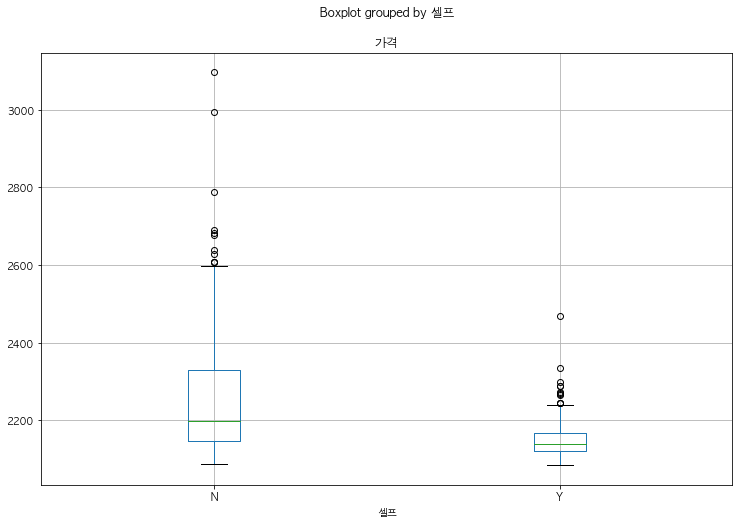

In [316]:
# boxplot 그리기
stations.boxplot(column='가격', by='셀프', figsize=(12, 8))  # column=y축, by=x축
plt.show()

In [317]:
import seaborn as sns

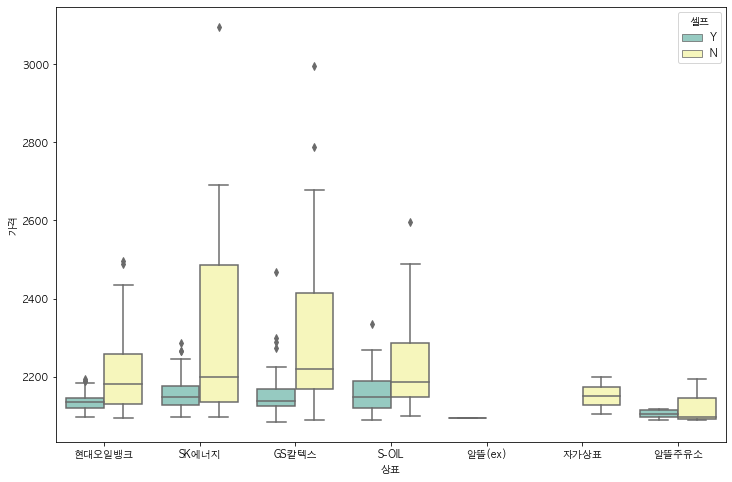

In [318]:
# 상표, 가격, 셀프를 boxplot으로 그리기
plt.figure(figsize=(12,8))
sns.boxplot(
    x='상표',
    y='가격',
    hue='셀프',
    data=stations,
    palette='Set3',
)
plt.show()

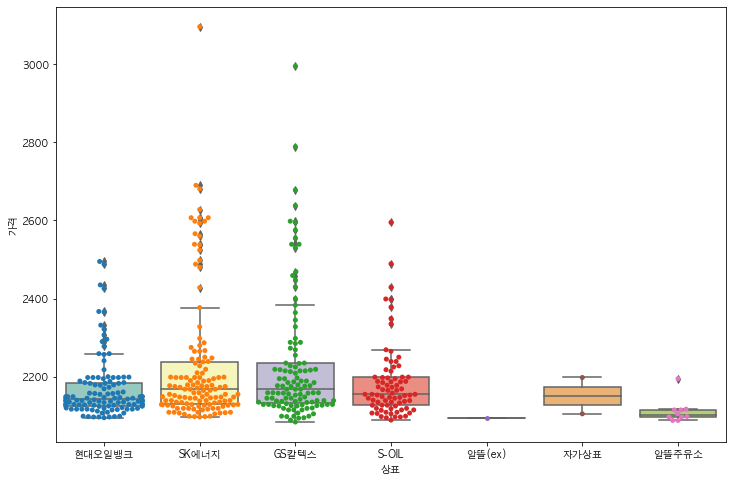

In [319]:
# 상표, 가격, 셀프를 boxplot으로 그리기
plt.figure(figsize=(12,8))
sns.boxplot(
    x='상표',
    y='가격',
    data=stations,
    palette='Set3',
)
sns.swarmplot(
    x='상표',
    y='가격',
    data=stations,
)
plt.show()

In [320]:
# 가격이 높은 순으로 정렬(top10)
stations.sort_values(by='가격', ascending=False).head(10)

,Oile_store,주소,가격,셀프,상표,구
282,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구
246,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구
281,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구
245,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구
244,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구
280,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구
455,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구
243,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구
242,에너비스,서울 용산구 한남대로 82 (한남동),2607,N,SK에너지,용산구
241,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구


In [321]:
# 가격이 낮은 순으로 정렬(top10)
stations.sort_values(by='가격', ascending=True).head(10)

,Oile_store,주소,가격,셀프,상표,구
222,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구
297,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구
298,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구
169,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구
170,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구
223,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구
194,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구
380,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구
68,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구
224,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구


In [322]:
# 가장 비싼 가격과 싼 가격 치이
stations['가격'].max() - stations['가격'].min()

1012

In [323]:
# 구별 가격 평균 높은순 (top10)
import numpy as np
gu_data = pd.pivot_table(stations[['가격','구']], index='구', aggfunc=np.mean)
#gu_data =pd.pivot_table(stations, index=['구'], values=['가격'],aggfunc=np.mean)
gu_data.sort_values(by='가격', ascending=False).head(10)

,가격
구,
용산구,2544.769231
중구,2466.500000
종로구,2387.125000
강남구,2335.882353
강동구,2240.000000
성동구,2239.470588
서초구,2232.758621
마포구,2212.416667
영등포구,2184.185185


## 지도표시

In [324]:
import json
import folium

In [325]:
geo_path = "../Data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start=10.5,
    tiles = "Stamen Toner",
)

folium.Choropleth(
    geo_data = geo_str,
    data=gu_data,
    columns=[gu_data.index, '가격'],
    fill_color='PuRd',
    key_on='feature.id'

).add_to(map)

map

In [326]:
# 가격이 제일 비싼 Top10 구성
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oile_store,주소,가격,셀프,상표,구
282,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구
246,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구
281,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구
245,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구
244,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구
280,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구
455,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구
243,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구
242,에너비스,서울 용산구 한남대로 82 (한남동),2607,N,SK에너지,용산구
241,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구


In [327]:
# 가격이 제일 비싼 Top10 구성
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oile_store,주소,가격,셀프,상표,구
222,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구
297,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구
298,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구
169,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구
170,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구
223,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구
194,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구
380,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구
68,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구
224,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구


In [328]:
client_id = '64un7uhpkm'
client_secret = 'thEUTy5Luc8Bi67HCDbp0VHZoaISWlAFWq2WJiLb'

In [329]:
# bottom10의 위도 경도 찾기 - bottom 10
station_lat = []
station_lng = []

import urllib.request
import json

for name in oil_price_bottom10['주소']:
    #print(name)
    encText = urllib.parse.quote(name)
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # JSON
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode("utf-8")
    else:
        print("Error Code:" + rescode)

    data = json.loads(enText)

    lng = data['addresses'][0]['x']
    station_lng.append(lng)
    lat = data['addresses'][0]['y']
    station_lat.append(lat)
        


In [330]:
# 위도 경도 추가
oil_price_bottom10['lat'] = station_lat
oil_price_bottom10['lng'] = station_lng

In [331]:
# Top10의 위도 경도 찾기 - top10
station_lat = []
station_lng = []

import urllib.request
import json

for name in oil_price_top10['주소']:
    #print(name)
    encText = urllib.parse.quote(name)
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # JSON
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode("utf-8")
    else:
        print("Error Code:" + rescode)

    data = json.loads(enText)

    lng = data['addresses'][0]['x']
    station_lng.append(lng)
    lat = data['addresses'][0]['y']
    station_lat.append(lat)
        


In [332]:
# 위도 경도 추가
oil_price_top10['lat'] = station_lat
oil_price_top10['lng'] = station_lng

In [333]:
oil_price_top10

,Oile_store,주소,가격,셀프,상표,구,lat,lng
282,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구,37.5583881,126.9721764
246,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구,37.5523505,126.9689935
281,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구,37.5609181,126.9936785
245,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구,37.5502224,126.9724921
244,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구,37.5215820,126.9653682
280,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구,37.5590707,127.0126262
455,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구,37.5115603,127.0471387
243,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구,37.5222584,126.9931989
242,에너비스,서울 용산구 한남대로 82 (한남동),2607,N,SK에너지,용산구,37.5360079,127.0061496
241,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구,37.5347069,127.0061196


In [340]:
map = folium.Map(
    location=[37.5502,126.982],
    zoom_start=11)


for n in oil_price_top10.index:
    folium.Marker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]],
                popup=oil_price_top10['Oile_store'][n]).add_to(map)
    folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]],
                popup=oil_price_top10['가격'][n],
                radius= oil_price_top10['가격'][n] / 200,
                color = 'red',
                fill_color = "red",
                fill_opacity = 0.2
                ).add_to(map)

for n in oil_price_bottom10.index:
    folium.Marker([oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]],
                popup=oil_price_bottom10['Oile_store'][n]).add_to(map)
    folium.CircleMarker([oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]],
                popup=oil_price_bottom10['가격'][n],
                radius= oil_price_bottom10['가격'][n] / 200,
                color = 'blue',
                fill_color = "blue",
                fill_opacity = 0.2
                ).add_to(map)

map

In [367]:
# 베스킨라빈스 전국매장
Baskin31 = pd.read_csv("../Data/Baskinrobbins.csv")
Baskin31.head()

,매장명,주소
0,비발디파크,강원 홍천군 서면 한치골길 262 (팔봉리)
1,춘천이마트,강원 춘천시 온의동 511번지 이마트춘천점 1층
2,춘천퇴계,강원 춘천시 행촌로 28
3,춘천한숲시티,강원 춘천시 퇴계동 1240
4,춘천온의,강원 춘천시 온의동 590 온의롯데캐슬스카이클래스 1층


In [368]:
# 베스킨라빈스31 위도, 경도 가져오기
Baskin_lat = []
Baskin_lng = []
address_fail = []

import urllib.request
import json

count = 0
for name in Baskin31['주소']:
    #print(name)
    encText = urllib.parse.quote(name)
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # JSON
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    try:
        if rescode == 200:
            response_body = response.read()
            enText = response_body.decode("utf-8")

            data = json.loads(enText)

            lng = data['addresses'][0]['x']
            Baskin_lng.append(lng)
            lat = data['addresses'][0]['y']
            Baskin_lat.append(lat)
    except:
        Baskin_lat.append(0)
        Baskin_lng.append(0)
        address_fail.append(count)
        print(count)
    
    count +=1

136
139
143
268
344
348
404
448
451
452
455
456
459
461
534
539
703
707
738
739
745
752
753


In [369]:
Baskin31['lat'] = Baskin_lat
Baskin31['lng'] = Baskin_lng

In [370]:
Baskin31

,매장명,주소,lat,lng
0,비발디파크,강원 홍천군 서면 한치골길 262 (팔봉리),37.6523371,127.6873348
1,춘천이마트,강원 춘천시 온의동 511번지 이마트춘천점 1층,37.8638082,127.7183660
2,춘천퇴계,강원 춘천시 행촌로 28,37.8591383,127.7242250
3,춘천한숲시티,강원 춘천시 퇴계동 1240,37.8543308,127.7309852
4,춘천온의,강원 춘천시 온의동 590 온의롯데캐슬스카이클래스 1층,37.8698281,127.7184844
...,...,...,...,...
763,죽암휴게소(하행),"충북 청주시 서원구 현도면 경부고속도로 289 (선동리, 죽암휴게소 부산방향)",36.4868923,127.4292716
764,충북보은,충북 보은군 보은읍 삼산로 20,36.4844169,127.7195536
765,충북단양,충북 단양군 단양읍 삼봉로 280,36.9817112,128.3691748
766,충북옥천,충북 옥천군 옥천읍 금구리 16-1,36.3010169,127.5689772


In [372]:
len(address_fail)

23

In [379]:
# 주소가져오기 실패자료 삭제
baskin_31 = Baskin31[Baskin31['lat']!=0]
baskin_31.reset_index(inplace=True)

In [395]:
# 지도 만들기
map = folium.Map(
  location=[37.00, 127.98], 
 
  zoom_start=8)

# 베스킨라빈스31 위치를 Marker로 표시
for i in baskin_31.index:
  folium.Marker([baskin_31['lat'][i], baskin_31['lng'][i]], popup=baskin_31['매장명'][i]).add_to(map)

map

In [396]:
for i in address_fail:
    print(Baskin31['주소'][i])

경남 창원시 의창구 원이대로 320 (대원동, 더시티세븐) 1층
경남 창원시 의창구 대원동 121 1층
경남 창원시 의창구 용호동 73-2
대구 달서구 용산동 231-11
대전 서구 복수동로 496.1층
부산 기장군 정관면 정관2로 모전리 735번지
서울 서초구 남부순환로 지하 2585 (서초동, 양재역)
세종특별자치시 113호,114호 세종특별자치시 해밀3로 51 (해밀동, 스카이허브)
세종특별자치시 세종특별자치시 아름동 1360 해피라움3 107호
세종특별자치시 어진동 세종특별자치시 절재로 154 (어진동, 홈플러스 세종점)
세종특별자치시 세종특별자치시 세종특별자치시 반곡동 45-14 시드니블루 101호, 102호
세종특별자치시 세종특별자치시 세종특별자치시 나성동 361-50 퍼스트원 194호, 195호
세종특별자치시 세종특별자치시 세종특별자치시 한솔동 971 첫마을5단지 제씨상가동 제지1층 103
세종특별자치시 세종특별자치시 세종특별자치시 대평동 568-1
인천 남동구 인하로 (구월동) 568 아시아드타워 108,109호
인천 남동구 논현동 한화에코메트로 7단지 701동 앞
충남 아산시 탕정면 매곡중앙로 70 (매곡리, 한들물빛도시지웰시티센트럴푸르지오2단지)
충남 아산시 배방읍 장재리 0
충북 청주시 상당구 공항로 126
충북 청주시 청원구 주성동 충청대로 174 한성빌딩 101호
충북 청주시 흥덕구 1순환로 664 1층 배스킨라빈스
충북 청주시 흥덕구 산남로 38 산남렉슬상가 106호
충북 청주시 흥덕구 월평로 4 대상탑존빌딩 1층
